In [34]:
#Library
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Connect to database

conn = sqlite3.connect("olist.db")

In [22]:
cur = conn.cursor()

In [32]:
# Read all table list

tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", conn)

In [33]:
tables

,type,name,tbl_name,rootpage,sql
0,table,olist_order_customer_dataset,olist_order_customer_dataset,2,"CREATE TABLE ""olist_order_customer_dataset"" (\..."
1,table,olist_order_dataset,olist_order_dataset,2644,"CREATE TABLE ""olist_order_dataset"" (\n""index"" ..."
2,table,olist_order_reviews_dataset,olist_order_reviews_dataset,7660,"CREATE TABLE ""olist_order_reviews_dataset"" (\n..."
3,table,olist_order_payments_dataset,olist_order_payments_dataset,11735,"CREATE TABLE ""olist_order_payments_dataset"" (\..."
4,table,olist_order_items_dataset,olist_order_items_dataset,13754,"CREATE TABLE ""olist_order_items_dataset"" (\n""i..."
5,table,olist_products_dataset,olist_products_dataset,18289,"CREATE TABLE ""olist_products_dataset"" (\n""inde..."
6,table,olist_sellers_dataset,olist_sellers_dataset,18983,"CREATE TABLE ""olist_sellers_dataset"" (\n""index..."
7,table,olist_geolocation_dataset,olist_geolocation_dataset,19040,"CREATE TABLE ""olist_geolocation_dataset"" (\n""i..."
8,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."


## Customer Table

In [66]:
# Making query for "customer" table

query = """
    SELECT *
    FROM olist_order_customer_dataset
    """

# Get "customer" table
cust = pd.read_sql(query, conn)
cust

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Order Table

In [47]:
# Making query for "order" table

query = """
    SELECT *
    FROM olist_order_dataset
    """

# Get "order" table
order = pd.read_sql(query, conn)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## Order Payments Table 

In [65]:
# Making query for "order payments" table

query = """
    SELECT *
    FROM olist_order_payments_dataset
    """

# Get "order payments" table
payments = pd.read_sql(query, conn)
payments

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


## Order Items 

In [51]:
# Making query for "order items" table

query = """
    SELECT *
    FROM olist_order_items_dataset
    """

# Get "order items" table
order_items = pd.read_sql(query, conn)
order_items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## Order Products Table

In [64]:
# Making query for "order products" table

query = """
    SELECT *
    FROM olist_products_dataset
    """

# Get "order products" table
products = pd.read_sql(query, conn)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Sellers Table

In [63]:
# Making query for "sellers" table

query = """
    SELECT *
    FROM olist_sellers_dataset
    """

# Get "sellers" table
sellers = pd.read_sql(query, conn)
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


## Geolocation Table

In [62]:
# Making query for "geolocation" table

query = """
    SELECT *
    FROM olist_geolocation_dataset
    """

# Get "geolocation" table
geo = pd.read_sql(query, conn)
geo

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS


## Product Category Name Translation Table

In [98]:
# Making query for "product category" table

query = """
    SELECT *
    FROM product_category_name_translation
    """

# Get "product category" table
product_category = pd.read_sql(query, conn)
product_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Data Cleaning

In [ ]:
# mengambil tabel yang dibutuhkan:
# order products, product category, orders, order items

### Order Product 

In [93]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [97]:
# filter kolom

products = products[['product_id', 'product_category_name']]
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


### Order Product Category

In [102]:
# delete index

product_category.drop(['index'], axis=1, inplace=True)

In [103]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Order Table

In [134]:
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [135]:
#filter kolom

order = order[['order_id', 'order_status', 'order_purchase_timestamp']]
order.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [136]:
# checking missing value on order table
order.isnull().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [140]:
# change order_purchase_timestamp to date
order.loc[2] = pd.to_datetime(order['order_purchase_timestamp'], yearfirst = True)

In [141]:
order.dtypes

order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

### Order Items

In [142]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [146]:
#filter kolom

order_items.drop(['index', 'order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value'], axis = 1, inplace=True)
order_items.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


In [147]:
#checking missing value on order items table

order_items.isnull().sum()


order_id      0
product_id    0
price         0
dtype: int64

#### checking nulls

## Merge: Order Product - Product Category Name

In [118]:
merge_1 = products.merge(product_category, how="left", on="product_category_name")
merge_1

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [119]:
#drop kolom dengan bahasa Portugal

merge_1.drop(['product_category_name'], axis = 1, inplace=True)
merge_1



,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


In [131]:
#rename kolom
merge_1.rename(columns={"product_category_name_english" : "product_name"}, inplace = True)
merge_1

,product_id,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


In [122]:
# checking missing value on merge_1
merge_1.isnull().sum()

product_id                         0
product_category_name_english    623
dtype: int64

In [123]:
# checking missing value percentage on merge_1
merge_1.isnull().sum()/len(products)*100

product_id                       0.000000
product_category_name_english    1.890686
dtype: float64

In [133]:
# change missing value with 'unknown'
merge_1['product_name'] = merge_1['product_name'].fillna('unknown')

# recheck missing value
merge_1.isnull().sum()

product_id      0
product_name    0
dtype: int64

## Merge: Order Product - Product Category Name - Order Items - Order

In [229]:
#menggabungkan tabel order items - merge_1
all_products = order_items.merge(merge_1, how = 'left', on = 'product_id')
all_products

,order_id,product_id,price,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,garden_tools
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,computers_accessories


In [254]:
product_final = all_products.merge(order, how = 'left', on = 'order_id')
product_final

,order_id,product_id,price,product_name,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumery,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,garden_tools,delivered,2017-02-04 13:57:51
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,housewares,delivered,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,computers_accessories,delivered,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,sports_leisure,delivered,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,computers_accessories,delivered,2017-08-14 23:02:59


In [271]:
product_final.dtypes

order_id                            object
product_id                          object
price                              float64
product_name                        object
order_status                        object
order_purchase_timestamp    datetime64[ns]
month_purchase                     float64
dtype: object

# Objektif 1: Top 10 Produk Terjual Terbanyak

In [255]:
top_selling = product_final[['product_name','order_id']].groupby(['product_name']).count().sort_values(by = ['order_id'], ascending = False).head(10)
top_selling

,order_id
product_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


/Users/qonitahafidz/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


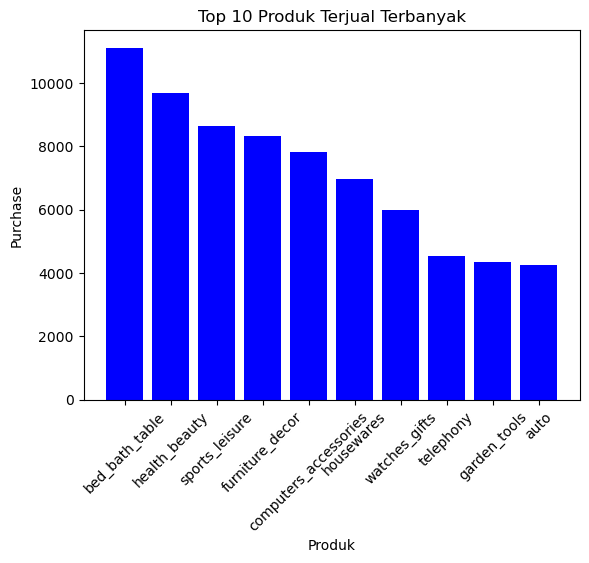

In [196]:
a = top_selling.index
b = top_selling.value_counts()[::-1].index

plt.bar(a,b, color='b')
plt.xticks(rotation=45)
plt.xlabel("Produk")
plt.ylabel("Purchase")
plt.title("Top 10 Produk Terjual Terbanyak")
plt.show()

# Objektif 2: Bottom 10 Produk Terjual 

In [256]:
bottom_selling = product_final[['product_name','order_id']].groupby(['product_name']).count().sort_values(by = ['order_id'], ascending = False).reset_index().tail(10)
bottom_selling

,product_name,order_id
62,music,38
63,furniture_mattress_and_upholstery,38
64,flowers,33
65,home_comfort_2,30
66,fashion_sport,30
67,arts_and_craftmanship,24
68,cds_dvds_musicals,14
69,la_cuisine,14
70,fashion_childrens_clothes,8
71,security_and_services,2


In [181]:
bottom_selling.dtypes

order_id    int64
dtype: object

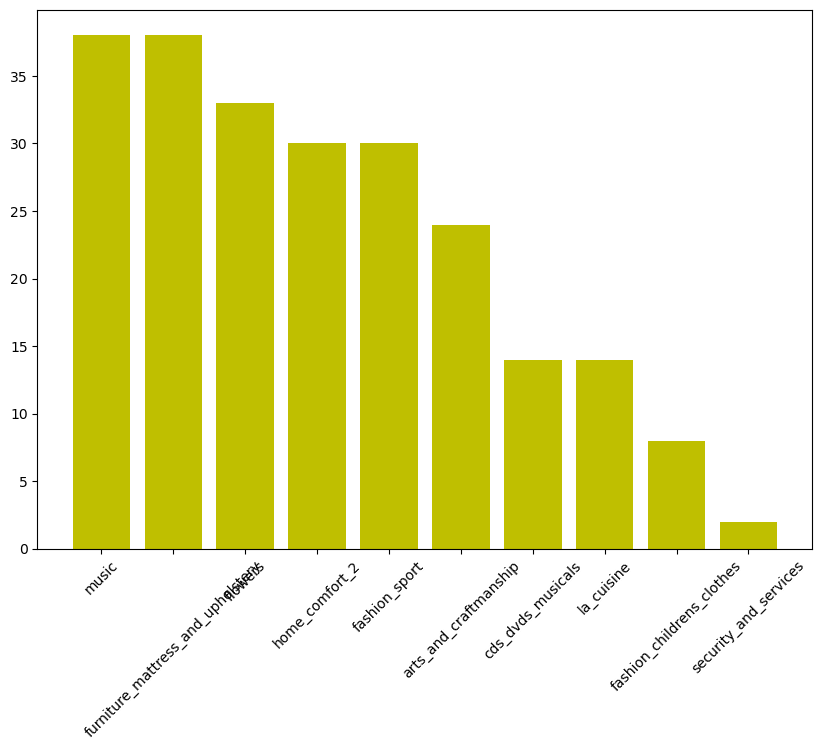

In [243]:
product = bottom_selling['product_name'].head(12)
purchase = bottom_selling['order_id'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(product[0:10], purchase[0:10], color='y')
plt.xticks(rotation=45)
 
# Show Plot
plt.show()

# Objektif 3: Produk dengan Revenue Tertinggi 

In [257]:
sales = product_final[['product_name','price']].groupby(['product_name']).sum().sort_values(by = ['price'], ascending = False).head(10)
sales

,price
product_name,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
furniture_decor,729762.49
cool_stuff,635290.85
housewares,632248.66
auto,592720.11


/Users/qonitahafidz/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


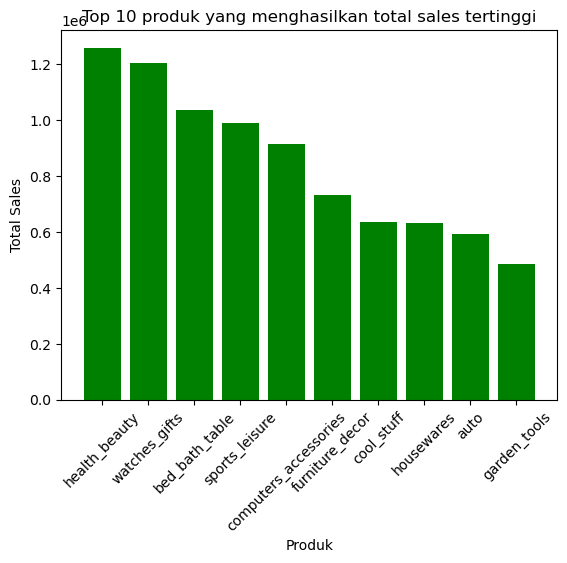

In [211]:
a = sales.index
b = sales.value_counts()[::-1].index

plt.bar(a,b, color = 'g')
plt.xticks(rotation=45)
plt.xlabel("Produk")
plt.ylabel("Total Sales")
plt.title("Top 10 produk yang menghasilkan total sales tertinggi")
plt.show()

# Objektif 4: Highest Purchase Customer

In [277]:
# mengekstrak bulan pada order_purchase_timestamp
product_final['month_purchase'] = product_final.order_purchase_timestamp.dt.month 

# mendefinisikan bulan
months_data = product_final.groupby(["month_purchase"])["month_purchase"].count()
months_data

month_purchase
1.0      9163
2.0      9623
3.0     11217
4.0     10659
5.0     12061
6.0     10661
7.0     11611
8.0     12157
9.0      4838
10.0     5685
11.0     8665
12.0     6309
Name: month_purchase, dtype: int64

Text(10, 12164, 'Highest Purchase (Month 8)')

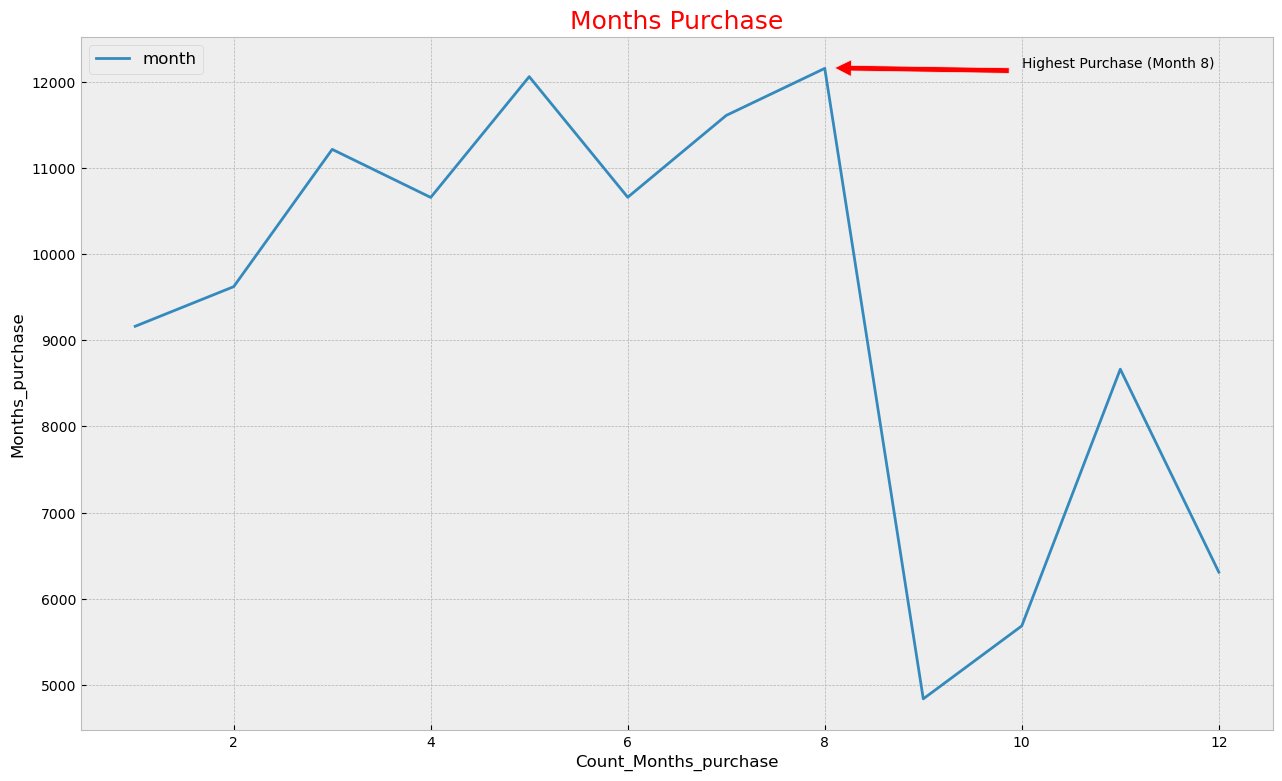

In [308]:
plt.subplot(2, 2, 2)
ax = months_data.plot(figsize=(25, 15))
ax.set_xlabel("Count_Months_purchase")
ax.set_ylabel("Months_purchase")
plt.title('Months Purchase', fontsize = 18, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Highest Purchase (Month 8)', xy=(8, 12164),xytext=(10, 12164),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )